In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#import the dataset
%pip install vega_datasets
from vega_datasets import data

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = data.movies()
df.head(5)

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3200 non-null   object 
 1   US_Gross                3194 non-null   float64
 2   Worldwide_Gross         3194 non-null   float64
 3   US_DVD_Sales            564 non-null    float64
 4   Production_Budget       3200 non-null   float64
 5   Release_Date            3201 non-null   object 
 6   MPAA_Rating             2596 non-null   object 
 7   Running_Time_min        1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major_Genre             2926 non-null   object 
 11  Creative_Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten_Tomatoes_Rating  2321 non-null   float64
 14  IMDB_Rating             2988 non-null   

In [4]:
df["US_Gross"] = df["US_Gross"] / 1000000
df["Worldwide_Gross"] = df["Worldwide_Gross"] / 1000000
df["Production_Budget"] = df["Production_Budget"] / 1000000

df["Release_Date"] = pd.to_datetime(df["Release_Date"])

df = df[df["Release_Date"].dt.year < 2025]

# Profit

$$Profit = Gross Revenue - Budget$$

In [5]:
df["Profit"] = df["Worldwide_Gross"] - df["Production_Budget"]

# Top 10 Movies By Profit

In [6]:
df.sort_values(by="Profit", ascending=False).head(10)[["Title", "Profit"]]

,Title,Profit
1234,Avatar,2530.891499
2970,Titanic,1642.879955
2202,The Lord of the Rings: The Return of the King,1039.027325
485,Jurassic Park,860.067947
1975,Harry Potter and the Sorcerer's Stone,851.457891
2741,Shrek 2,849.838758
2987,Toy Story 3,846.340665
2507,Pirates of the Caribbean: Dead Man's Chest,840.659812
1266,The Dark Knight,837.345358
2201,The Lord of the Rings: The Two Towers,832.284377


# 1 - Budget Vs Profit

<Axes: xlabel='Production Budget', ylabel='Profit'>

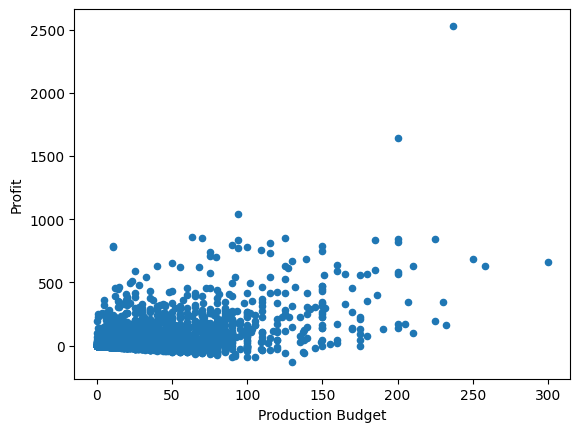

In [7]:
df.plot\
    .scatter(x="Production_Budget", 
             y="Profit",
             xlabel="Production Budget",
             ylabel="Profit")


# 2- U.S vs Worldwide Gross

- U.S. Gross and Worldwide Gross generally seem positively correlated. Most movies fall within a reasonable distance of the trend line.

(-138.39457495, 2906.2860739499997)

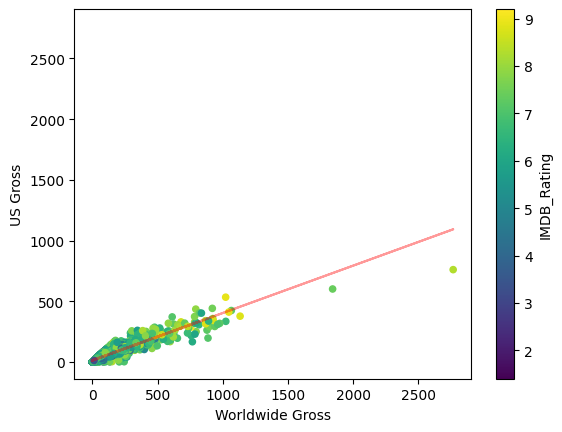

In [8]:


colors = ("gray","blue","red","orange","cyan", "pink", "purple", "green", "yellow", "black",)


ax = df.plot\
        .scatter(x="Worldwide_Gross", 
                y="US_Gross",
                xlabel="Worldwide Gross",
                ylabel="US Gross",
                c="IMDB_Rating",
                cmap="viridis")

# trendline
nadf = df.dropna()
z = np.polyfit(nadf["Worldwide_Gross"], nadf["US_Gross"], 1)
p = np.poly1d(z)

plt.plot(df["Worldwide_Gross"], p(df["Worldwide_Gross"]), color="red", alpha=0.4)

plt.ylim(plt.xlim())

# 3- Box Office Returns By Genre

- The **adventure** genre has the biggest hits, as well as the biggest flops. Documentary genre seems like it breaks even regularly without making too much profit. **Musicals** and **Concert/Performance** genres seem cash positive which is nice to see.

<Axes: >

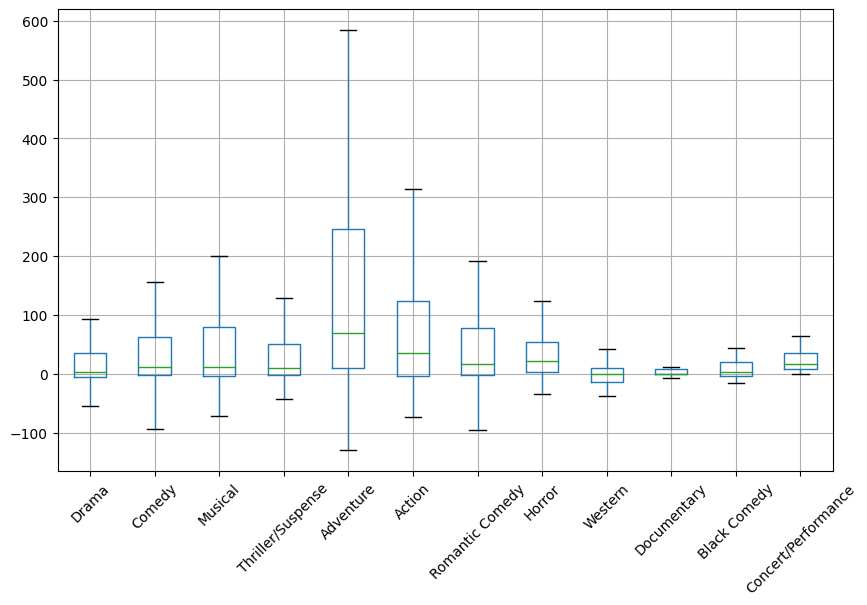

In [9]:

genres = df[~pd.isna(df["Major_Genre"])]["Major_Genre"]\
    .unique()\
    .tolist()

fig, ax = plt.subplots(1, figsize=(10,6))

df\
    .pivot(columns="Major_Genre", values="Profit")\
    .reset_index()\
    .boxplot(column=genres,
             rot=45,
             showfliers=False,
             ax=ax)

# 4- Fan Favorites vs Critical Darlings (also 8-)

- 4. Both critic ratings and fan ratings seem to have a positive correlation with profitability however **fan** ratings clearly have a higher correlation coefficient compared to **critics** scores. The biggest disagreements between the fans and the critics were on `Aeon Flux` and `Panic`. Interestingly both movies failed to turn a profit.

- 8. Fan ratings correlate positively with profitability. Although the effect seems to get non-linearly stronger as the ratings reach top percentiles. 

/home/cake/.local/lib/python3.10/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/home/cake/.local/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/cake/.local/lib/python3.10/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


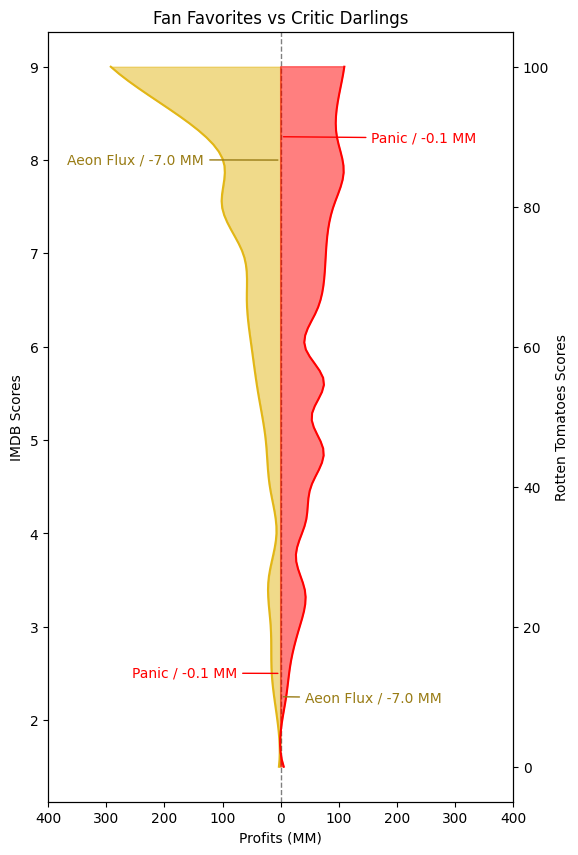

In [10]:
from scipy.interpolate import interp1d

IMDB_COLOR = '#E2B616'
ratingsdf = df[["IMDB_Rating", "Rotten_Tomatoes_Rating", "Profit"]].dropna()
ratingsdf["Delta"] = df["IMDB_Rating"] * 10. - df["Rotten_Tomatoes_Rating"]
#ratingsdf = pd.concat([ratingsdf, pd.DataFrame({"IMDB_Rating":[0, 10.1], "Rotten_Tomatoes_Rating":[0, 101], "Profit":[0,0]})])

ratingsdf["IMDB_Rating"] = (ratingsdf["IMDB_Rating"]).apply(lambda x: (round(x * 2) / 2))
ratingsdf["Rotten_Tomatoes_Rating"] = ratingsdf["Rotten_Tomatoes_Rating"].apply(lambda x: round(x / 5) * 5)

imdb_ratings_df = ratingsdf\
                        .groupby("IMDB_Rating")\
                        .mean()\
                        .reset_index()

fig, ax = plt.subplots(1, figsize = (6, 10))

plt.axvline(0, color='black', alpha=0.5, linestyle='--', linewidth=1., label='breakeven')

f_cubic = interp1d(
                imdb_ratings_df["IMDB_Rating"],
                - imdb_ratings_df["Profit"], 
                kind='cubic',
                fill_value="extrapolate"
            )

x_b = np.linspace(imdb_ratings_df["IMDB_Rating"].min(),
                  imdb_ratings_df["IMDB_Rating"].max(),
                  100
                  )
y_b = f_cubic(x_b)
ax.plot(y_b, x_b , color=IMDB_COLOR)
ax.fill_betweenx(x_b, y_b , 0, where=(y_b <= 0), interpolate=True, color=IMDB_COLOR, alpha=0.5)

#rotten tomatoes
ax2 = ax.twinx()

rt_ratings_df = ratingsdf\
                        .groupby("Rotten_Tomatoes_Rating")\
                        .mean()\
                        .reset_index()

rt_ratings_df = rt_ratings_df.sort_values(by="Rotten_Tomatoes_Rating")

x_b = np.linspace(rt_ratings_df["Rotten_Tomatoes_Rating"].min(),
                  rt_ratings_df["Rotten_Tomatoes_Rating"].max(),
                  100)

f_cubic_1 = interp1d(
                rt_ratings_df["Rotten_Tomatoes_Rating"],
                rt_ratings_df["Profit"], 
                kind='cubic',
                fill_value="extrapolate"
            )

y_b_1 = f_cubic_1(x_b)
ax2.plot(y_b_1, x_b, color="red")
ax2.fill_betweenx(x_b, y_b_1 , 0, where=(y_b_1 >= 0), interpolate=True, color='red', alpha=0.5)


xticks, _ = plt.xticks()
mtick = max(abs(xticks))
plt.xlim([-mtick, mtick])

xticks, _ = plt.xticks()
plt.xticks(xticks, 
           [f"{item:.0f}" for item in abs(xticks)])

plt.title("Fan Favorites vs Critic Darlings")
ax.set_ylabel("IMDB Scores")
ax2.set_ylabel("Rotten Tomatoes Scores")
ax.set_xlabel("Profits (MM)")

# Fan favorite, critics hate it
ffch = ratingsdf[(ratingsdf["Delta"] == ratingsdf["Delta"].max())]
def annot_greatest_diff(ffch, ax, ax2, color):
    fan_rting, crtc_rting = ffch["IMDB_Rating"], ffch["Rotten_Tomatoes_Rating"]
    fan_prof, crtc_prof = f_cubic(fan_rting), f_cubic_1(crtc_rting)
    fan_annot = f"{df.loc[ffch.index[0]].Title} / {ffch.Profit.item():.1f} MM"
    ax.annotate(
        fan_annot,
        xy=(0, fan_rting),
        xytext=(fan_prof - 150, fan_rting - 0.04),
        xycoords="data",
        ha="center",
        arrowprops={
            "arrowstyle":"-",
            "color":color
        },
        color=color
    )

    ax2.annotate(
        fan_annot,
        xy=(0, crtc_rting),
        xytext=(crtc_prof + 150, crtc_rting - 0.75),
        xycoords="data",
        ha="center",
        arrowprops={
            "arrowstyle":"-",
            "color":color
        },
        color=color
    )
annot_greatest_diff(ffch, ax, ax2, "#997c15")
# Fans hate it, critics love it

fhcl = ratingsdf[(ratingsdf["Delta"] == ratingsdf["Delta"].min())].tail(1)
annot_greatest_diff(fhcl, ax, ax2, "red" )



# 5- Most Popular Directors

- It's interesting to see the contrast between the U.S. based metric; `US DVD Sales` and the more global metric `IMDB Scores`. **Steven Spielberg** takes the cake when it comes to global popularity whereas **Gore Verbinski** is the most popular director based on U.S DVD sales.

<Axes: title={'center': 'Most Popular Directors'}, xlabel='Director', ylabel='US DVD Sales'>

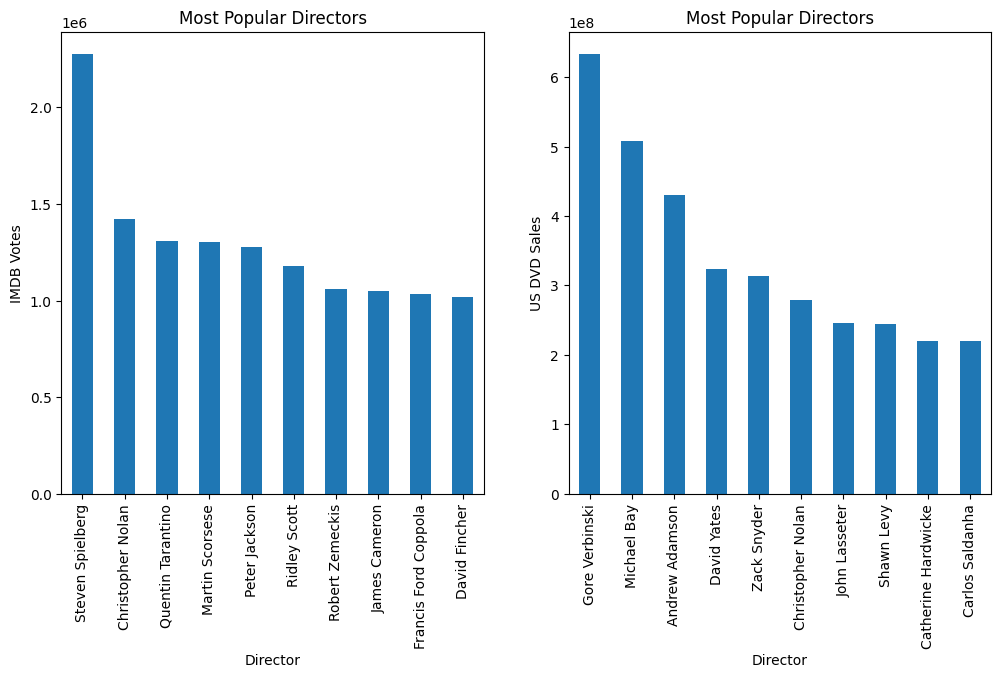

In [11]:
fig, axs = plt.subplots(1,2, figsize=(12,6))

df\
    .groupby("Director")\
    ["IMDB_Votes"]\
    .sum()\
    .sort_values(ascending=False)\
    .head(10)\
    .plot\
    .bar(
        ylabel="IMDB Votes",
        title="Most Popular Directors",
        ax=axs[0]
    )

df\
    .groupby("Director")\
    ["US_DVD_Sales"]\
    .sum()\
    .sort_values(ascending=False)\
    .head(10)\
    .plot\
    .bar(
        ylabel="US DVD Sales",
        title="Most Popular Directors",
        ax=axs[1]
    )

# 6- Most Profitable Directors

- **Steven Spielberg** and **James Cameron** are vastly more profitable compared to the rest of the directors in the dataset. All of the directors in the top 10 are a part of the **billion** club.

<Axes: title={'center': 'Most Profitable Directors'}, xlabel='Director', ylabel='Total Profit (MM)'>

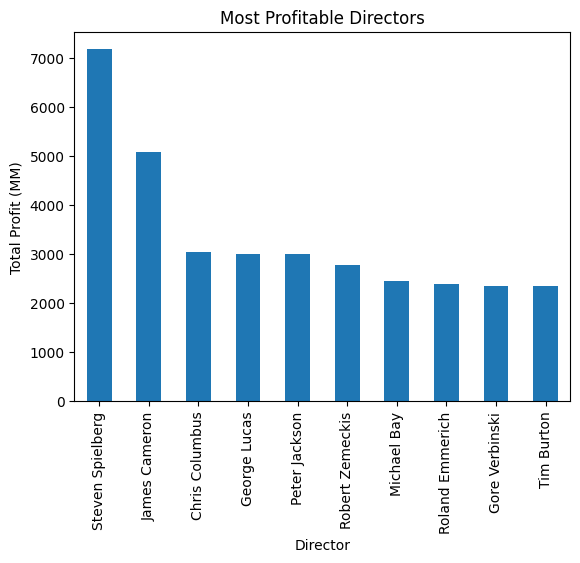

In [12]:
df\
    .groupby("Director")\
    ["Profit"]\
    .sum()\
    .sort_values(ascending=False)\
    .head(10)\
    .plot\
    .bar(
        ylabel="Total Profit (MM)",
        title="Most Profitable Directors"
    )

# 7- Trend in Profits By Genre

- Romantic comedy used to be the biggest profit leader and it lost profit share consistently over the decades. Musicals were also way bigger in the 90s, however they seem to have made a semi-comeback in the 10s. Adventure movies maintained a relatively high profit share over all the decades.

Text(0.5, 1.0, 'Share of Profits Across')

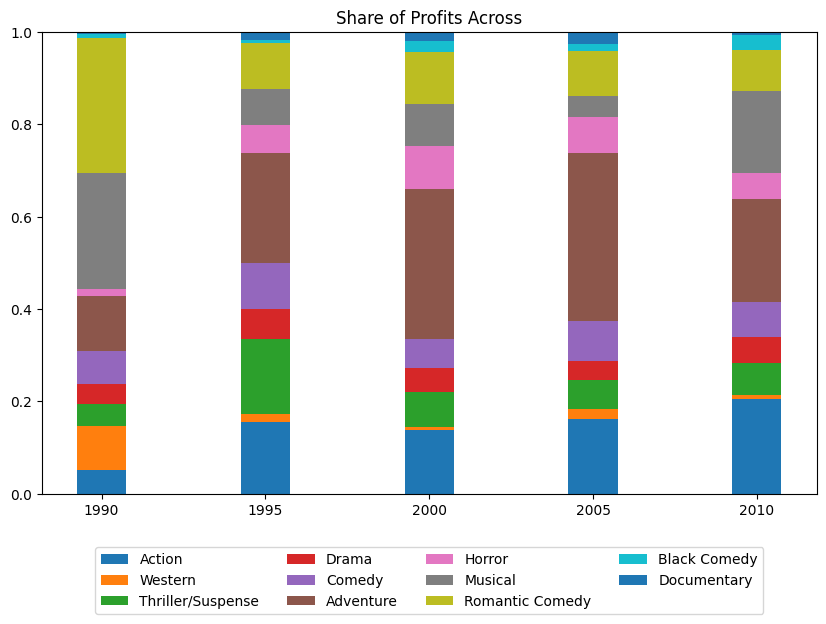

In [13]:

fig, ax = plt.subplots(1, figsize=(10, 6))

df["Year (Rounded)"] = (round(df.Release_Date.dt.year / 5) * 5).astype(int)
df["Profits Only"] = df["Profit"].apply(lambda x: x if x >= 0 else 0.)

all_indexes = list(range(df["Year (Rounded)"].min(), df["Year (Rounded)"].max(), 5))

gdf = pd.Series(data={idx:0. for idx in all_indexes}, index=all_indexes)

tp_df = sum(
    [
    df[df["Major_Genre"] == genre]\
                .sort_values(by="Release_Date")\
                .groupby("Year (Rounded)")\
                ["Profits Only"]\
                .mean()
    for genre in nadf["Major_Genre"].unique()

    ]
)

for genre in nadf["Major_Genre"].unique():
    gp_df = df[df["Major_Genre"] == genre]\
                .sort_values(by="Release_Date")\
                .groupby("Year (Rounded)")\
                ["Profits Only"]\
                .mean()
    ndf = gdf + gp_df / tp_df

    ax.bar(ndf.index, gp_df / tp_df, width=1.5,label=genre, bottom=gdf)
    gdf = ndf

plt.legend(ncol=4,loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax.set_ylim([0,1])
#ax.set_xlim([1970, 2010])

plt.title("Share of Profits Across")

# 9- Distribution of Running Time

- Most movies fall between the **80 minute** and **140 minute** mark. A small amount of movies are **< 60 minutes** or **> 160 minutes**

Text(0, 0.5, '# of Movies')

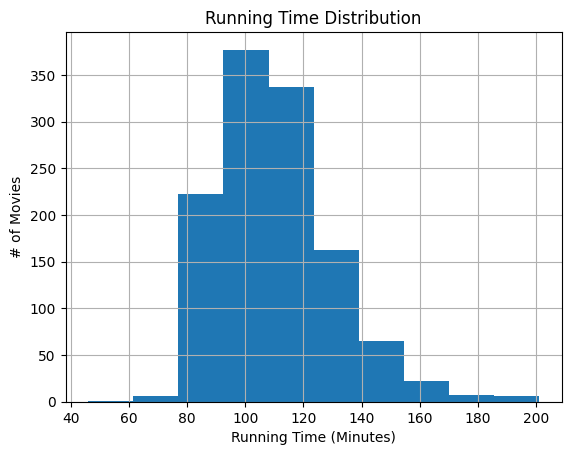

In [14]:
df.hist(
    column="Running_Time_min",
    )

plt.title("Running Time Distribution")
plt.xlabel("Running Time (Minutes)")
plt.ylabel("# of Movies")

# 10- Profits of Top 10 Most Popular Movies

- The lord of the Rings is the most profitable movie when sorted by IMDB popularity. It made over *10x* what Shawshank Redemption made in profits.

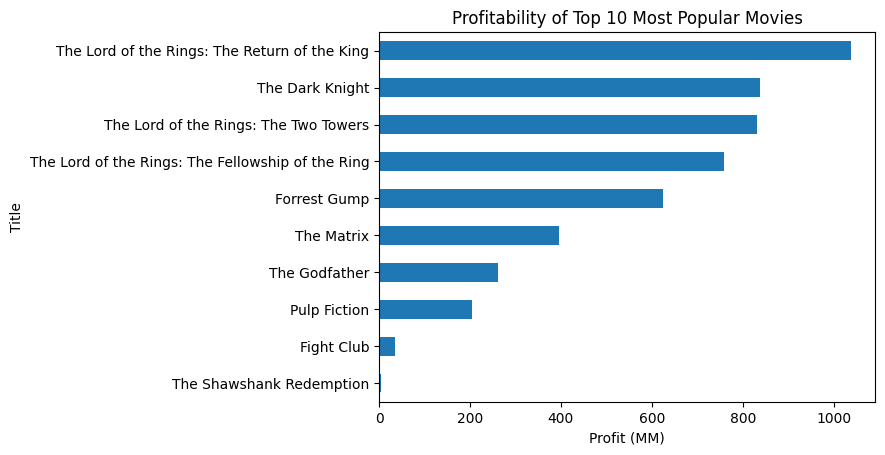

In [15]:
ax = df\
    .sort_values(by="IMDB_Votes", ascending=False)\
    .head(10)\
    .sort_values(by="Profit")\
    .plot\
    .barh(x="Title", y="Profit", xlabel="Profit (MM)", title="Profitability of Top 10 Most Popular Movies")

ax.get_legend().remove()



# 11- Rotten Tomatoes Scores vs IMDB Scores

- When normalized to a comparable rating scale, Rotten Tomatoes scores and IMDB scores have a delta of $[-4, 4]$ most of the time. A small number of movies (e.g. Aeon Flux, Panic) are the cause of massive disagreements between critics and fans with $>7$ difference in ratings.

Text(45, 425, 'Liked By IMDB')

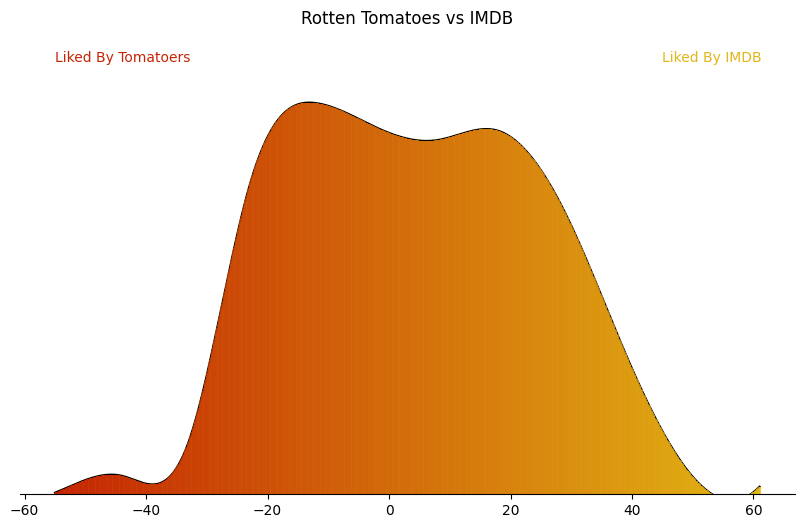

In [16]:
from matplotlib.collections import PolyCollection


bins = (ratingsdf["Delta"].max() - ratingsdf["Delta"].min()) / 10

ratingsdf["Delta(binned)"] = pd\
                                .cut(ratingsdf["Delta"], bins=int(bins))\
                                .apply(lambda x: int(x.left))

rdf = ratingsdf.groupby("Delta(binned)").count()

x_b = np.linspace(ratingsdf["Delta"].min() + 10,
                  ratingsdf["Delta"].max() - 10,
                  1000)
f_cubic = interp1d(
                rdf.index,
                rdf.Profit, 
                kind='cubic',
                fill_value="extrapolate"
            )

y_b = f_cubic(x_b)

fig, ax = plt.subplots(1,figsize=(10,6))
ax.plot(x_b, y_b, color="black")
ax.fill_between(x_b,y_b, 0, where=(y_b >= 0), alpha=1, color="yellow")

plt.title("Rotten Tomatoes vs IMDB")

frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)
ax.spines[['right', 'left', 'top']].set_visible(False)

imdb_color, tomato_color = (226, 182, 22) , (197, 36, 4)
gradient = np.apply_along_axis(
    lambda rgb: '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2])).upper(), 
    1,
    np.linspace(tomato_color, imdb_color, x_b.shape[0]))

for idx, (x,y) in enumerate(zip(x_b, y_b)):
    plt.vlines(x=x, ymin=0, ymax=y, color=gradient[idx], alpha=0.75)


plt.ylim([0, 450])

plt.annotate(
    'Liked By Tomatoers',
    xy=(-50, 425.),
    xytext=(-55, 425),
    va="center",
    color="#C52404"
)

plt.annotate(
    'Liked By IMDB',
    xy=(50, 425),
    xytext=(45, 425),
    va="center",
    color="#E2B616"
)

# 12- How many movies made more than 200 MM?

- A healthy amount of movies made more than 200 million in profits. Movies that are above the 200 million mark are more likely to be outliers compared to those below the 200 million mark.

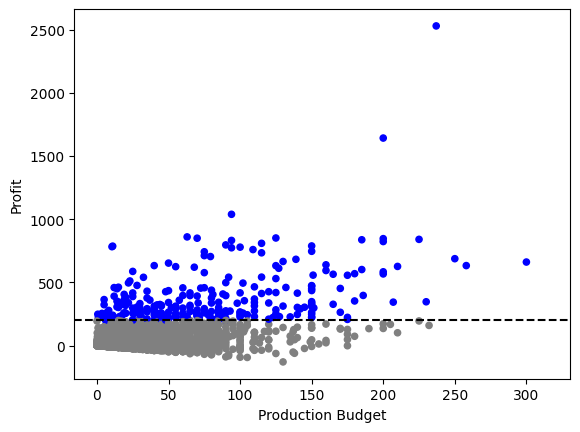

In [17]:


df["made_more_than_200_mm"] = (df["Profit"] >= 200).apply(lambda x: "blue" if x else "gray")

df.plot\
    .scatter(x="Production_Budget", 
             y="Profit",
             xlabel="Production Budget",
             ylabel="Profit",
             c="made_more_than_200_mm")

xlim = plt.xlim()
plt.axline((0,200), (max(xlim),200), color="black", linestyle="--")

# 13- Strategy Per Genre

- The last month of the year consistently sees more releases compared to earlier months. This is mostly driven by the `Drama` genre. January has a sharp drop-off compared to december. Action movies are pretty consistent through out the year with a slight increase in the summer months.

/tmp/ipykernel_186888/2805574266.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


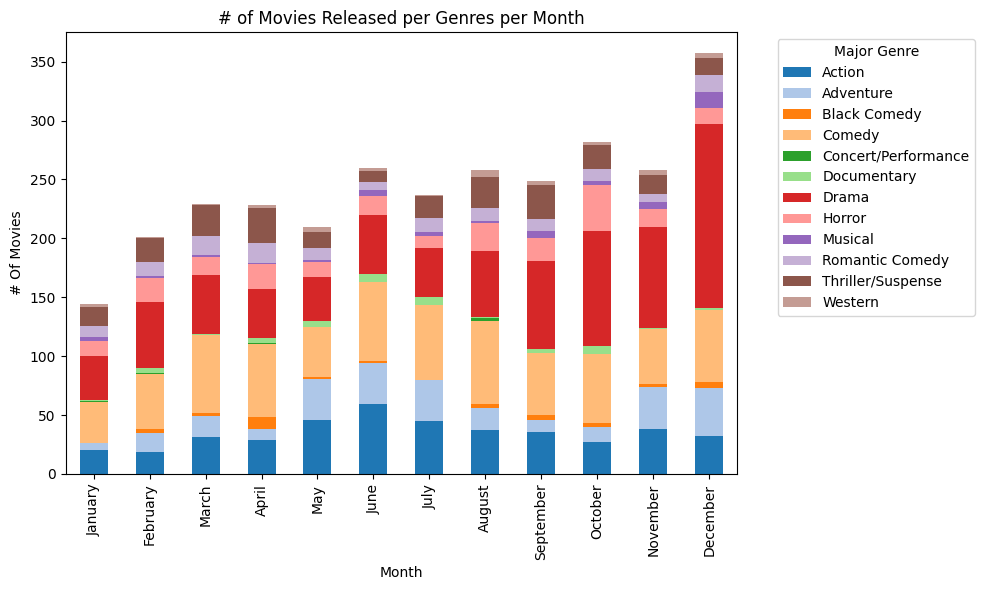

In [26]:
from matplotlib.cm import get_cmap
import calendar

cmap = get_cmap('tab20')

df["Month"] = df["Release_Date"].dt.month

genre_cnts = df\
                .groupby(["Month", "Major_Genre"])["Title"]\
                .count()\
                .reset_index(name="Count")

pivot_df = genre_cnts.pivot(index='Month', columns='Major_Genre', values='Count').fillna(0)
colors = [cmap(i) for i in range(pivot_df.shape[1])]
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ticks, _ = plt.xticks()
labels = [calendar.month_name[idx+1] for idx in ticks]
plt.xticks(ticks, labels)
# Adding titles and labels
plt.title('# of Movies Released per Genres per Month')
plt.xlabel('Month')
plt.ylabel('# Of Movies')
plt.legend(title='Major Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
